## Config stuff

In [1]:
%autosave 0
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Autosave disabled


## Common code

In [2]:
from pprint import pprint

from matplotlib.text import Text
import matplotlib.pyplot as plt
import numpy as np


def plot_points(points):
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.scatter(points[:, 0], points[:, 1])
    ax = plt.gca()
    # label points
    label_points(points, "p")



def label_points(points, label, y_off=0):
    ax = plt.gca()
    for i, (x, y) in enumerate(points):
        ax.add_artist(Text(x, y + y_off, f"${label}_{{{i}}}$"))

## Convex-Hull demo

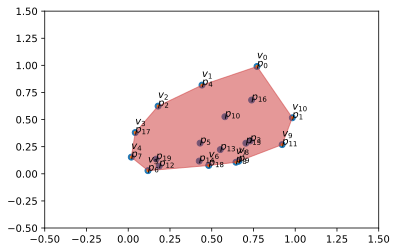

In [5]:
from matplotlib.patches import Polygon
from convex_hull_dataset import get_points, get_verts


def get_hull(points):
    verts = get_verts(points)
    return points[verts]


def plot_hull(verts):
    plt.scatter(verts[:, 0], verts[:, 1], s=4)
    # surrounding polygon
    ax = plt.gca()
    poly = Polygon(verts, color=(0.8, 0.2, 0.2, 0.5))
    ax.add_artist(poly)
    # label vertices
    label_points(verts, "v", 0.075)


def hull_demo():
    points = get_points()
    verts = get_hull(points)
    plot_points(points)
    plot_hull(verts)


hull_demo()

100%|██████████| 1/1 [00:00<00:00, 1204.22it/s]

creating 1 samples of size 8
[1, 4, 5, 6, 3, 7, 8]


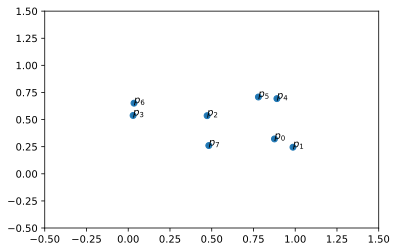

In [18]:
from convex_hull_dataset import ConvexHullSample
import torch

model = torch.load('trained_model.pt')

def hull_model_demo(size=8):
    (sample,) = ConvexHullSample.create_samples(1,size)
    model_result = model(sample.points)
    points = np.stack([p.numpy()[:2] for p in sample.points])
    print(model_result.decoded_seq)
#     verts = points[model_result.decoded_seq]
    plot_points(points)
#     plot_hull(verts)


hull_model_demo()

## Delaunay Demo

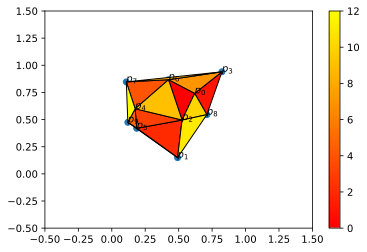

In [4]:
from scipy.spatial import Delaunay
from matplotlib.collections import PolyCollection
import matplotlib.cm as cm


def get_delaunay(points):
    return sorted(list(map(list, Delaunay(points).simplices)))


def plot_delaunay(points):
    delaunay = get_delaunay(points)
    # pprint(delaunay)
    collection = PolyCollection(
        [points[simplex] for simplex in delaunay],
        edgecolors="black",
        cmap=cm.autumn,
    )
    collection.set_array(np.arange(len(delaunay)))
    plt.gca().add_collection(collection)
    plt.colorbar(collection)


def delaunay_demo():
    points = get_points(10)
    plot_points(points)
    plot_delaunay(points)


delaunay_demo()
